# Miniproyecto 3: Clasificación de animales

## Entrega 1

La clasificación es una de las principales tareas del machine learning. Esta tarea se basa en el usar caracteristicas propias de cada elemento para dividir los datos en diferentes categorias de interés. Sin embargo, los problemas de clasificación tiene muchos inconvenientes en su implementación practica, las clases pueden tener una baja variabilidad entre ellas y alta variabilidad al interior de cada una. Ahora, el trabajo de clasificación en la visión por computador va mas alla de unicamente discriminar los datos en clases ya que una parte importante es poder extraer las caracteristicas que permitan hacer la diferenciación de las clases. 

A lo largo de todo este miniproyecto nos familiarizaremos con los diferentes clasificadores y descriptores para lograr categorizar las imagenes. En este usaremos un dataset de imagenes de 5 diferentes animales, cada tipo de animal tiene una caracteristica que nosotors, como humanos, somos capaces de identificar para distinguirlos. Veremos como representar estas caracteristicas visuales de forma que un computador pueda entenderlo y categorizar las imagenes usando algoritmos de clasificación. 

### Parte 1: Exploración de la base de datos
Como hemos venido haciendo en todos los miniproyectos, es importante analizar la base de datos con la que trabajaremos. En la siguiente celda determine cuantas imagenes de cada categoria tenemos en cada carpeta (train, valid y test). Tenga en cuenta, que en esta ocasión no debemos cargar datos adicionales para las labels. Cargue las imagenes de train y guardelas en una lista con todas ellas. Aqui es importante que se aseguren que las imagenes sean de 300x300, de no ser así debemos cambiar sus dimensiones para que así sea. Para cambiar el tamaño pueden usar la función resize de open-cv:https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d

In [1]:
import cv2
#from skimage import io
from glob import glob
import numpy as np
import os

# images train
imgs_elefante_train=''
imgs_caballo_train=''
imgs_gato_train=''
imgs_oveja_train=''
imgs_perro_train=''
# paths valid
paths_elefante_valid=''
paths_caballo_valid=''
paths_gato_valid=''
paths_oveja_valid=''
paths_perro_valid=''
# paths test
paths_elefante_test=''
paths_caballo_test=''
paths_gato_test=''
paths_oveja_test=''
paths_perro_test=''

# YOUR CODE HERE
# Se obtienen los paths de train
paths_elefante_train = glob(os.path.join('Dataset','Train','Elefante','*.jpeg'))
paths_caballo_train = glob(os.path.join('Dataset','Train','Caballo','*.jpeg'))
paths_gato_train = glob(os.path.join('Dataset','Train','Gato','*.jpeg'))
paths_oveja_train = glob(os.path.join('Dataset','Train','Oveja','*.jpeg'))
paths_perro_train = glob(os.path.join('Dataset','Train', 'Perro','*.jpeg'))

# Para cada lista de paths, se obtienen las imagenes, se cambia el tamaño y se añaden a la lista de imágenes
imgs_elefante_train=[]
for path in paths_elefante_train:
    img = cv2.imread(path)
    #print(img.shape, img)
    resized_img = cv2.resize(img, (300,300))
    #print(resized_img.shape, resized_img)
    imgs_elefante_train.append(resized_img)
imgs_elefante_train = np.array(imgs_elefante_train)

imgs_caballo_train=[]
for path in paths_caballo_train:
    img = cv2.imread(path)
    resized_img = cv2.resize(img, (300,300))
    imgs_caballo_train.append(resized_img)
imgs_caballo_train = np.array(imgs_caballo_train)
    
imgs_gato_train=[]
for path in paths_gato_train:
    img = cv2.imread(path)
    resized_img = cv2.resize(img, (300,300))
    imgs_gato_train.append(resized_img)
imgs_gato_train = np.array(imgs_gato_train)

imgs_oveja_train=[]
for path in paths_oveja_train:
    img = cv2.imread(path)
    resized_img = cv2.resize(img, (300,300))
    imgs_oveja_train.append(resized_img)
imgs_oveja_train = np.array(imgs_oveja_train)

imgs_perro_train=[]
for path in paths_perro_train:
    img = cv2.imread(path)
    resized_img = cv2.resize(img, (300,300))
    imgs_perro_train.append(resized_img)
imgs_perro_train = np.array(imgs_perro_train)

# Se obtienen los paths de valid
paths_elefante_valid = glob(os.path.join('Dataset','Valid','Elefante','*.jpeg'))
paths_caballo_valid = glob(os.path.join('Dataset','Valid','Caballo','*.jpeg'))
paths_gato_valid = glob(os.path.join('Dataset','Valid','Gato','*.jpeg'))
paths_oveja_valid = glob(os.path.join('Dataset','Valid','Oveja','*.jpeg'))
paths_perro_valid = glob(os.path.join('Dataset','Valid','Perro','*.jpeg'))

# Se obtienen los paths de test
paths_elefante_test = glob(os.path.join('Dataset','Test','Elefante','*.jpeg'))
paths_caballo_test = glob(os.path.join('Dataset','Test','Caballo','*.jpeg'))
paths_gato_test = glob(os.path.join('Dataset','Test','Gato','*.jpeg'))
paths_oveja_test = glob(os.path.join('Dataset','Test','Oveja','*.jpeg'))
paths_perro_test = glob(os.path.join('Dataset','Test','Perro','*.jpeg'))

In [2]:
import numpy as np
assert len(imgs_elefante_train)+len(imgs_caballo_train)+len(imgs_gato_train)+len(imgs_oveja_train)+len(imgs_perro_train) !=0, 'No cargo ninguna imagen del dataset de entrenamiento'
assert np.isclose(len(imgs_elefante_train),531,0.1), f'Deberia tener 531 imagenes en su vector de elefantes train, tiene {len(imgs_elefante_train)}'
assert imgs_elefante_train[0].shape[0]==imgs_perro_train[0].shape[0], f'Las dimensiones de todas las imagenes en train deberian ser iguales'
assert np.isclose(np.std(imgs_gato_train[0]),60.51,0.1),  'Usted no leyo o guardo bien sus imagenes'
### BEGIN HIDDEN SOLUTIONS
assert np.isclose(len(paths_elefante_test),274,0.1)
### END HIDDEN SOLUTIONS

In [3]:
# Usen esta celda para imprimir las estadisticas de su base de datos. 
# Pueden usar el codigo de las tablas del primer miniproyecto

print ("{:<8}             | {:<15}".format('Fold','Total images'))
print ('------------------------------------------------------')
print ("{:<20} | {:<15}".format('Train elefantes',len(paths_elefante_train)))
print ("{:<20} | {:<15}".format('Valid elefantes',len(paths_elefante_valid)))
print ("{:<20} | {:<15}".format('Test elefantes',len(paths_elefante_test)))

print()

print ("{:<8}             | {:<15}".format('Fold','Total images'))
print ('------------------------------------------------------')
print ("{:<20} | {:<15}".format('Train caballos',len(paths_caballo_train)))
print ("{:<20} | {:<15}".format('Valid caballos',len(paths_caballo_valid)))
print ("{:<20} | {:<15}".format('Test caballos',len(paths_caballo_test)))

print()

print ("{:<8}             | {:<15}".format('Fold','Total images'))
print ('------------------------------------------------------')
print ("{:<20} | {:<15}".format('Train gatos',len(paths_gato_train)))
print ("{:<20} | {:<15}".format('Valid gatos',len(paths_gato_valid)))
print ("{:<20} | {:<15}".format('Test gatos',len(paths_gato_test)))

print()

print ("{:<8}             | {:<15}".format('Fold','Total images'))
print ('------------------------------------------------------')
print ("{:<20} | {:<15}".format('Train ovejas',len(paths_oveja_train)))
print ("{:<20} | {:<15}".format('Valid ovejas',len(paths_oveja_valid)))
print ("{:<20} | {:<15}".format('Test ovejas',len(paths_oveja_test)))

print()

print ("{:<8}             | {:<15}".format('Fold','Total images'))
print ('------------------------------------------------------')
print ("{:<20} | {:<15}".format('Train perros',len(paths_perro_train)))
print ("{:<20} | {:<15}".format('Valid perros',len(paths_perro_valid)))
print ("{:<20} | {:<15}".format('Test perros',len(paths_perro_test)))

Fold                 | Total images   
------------------------------------------------------
Train elefantes      | 531            
Valid elefantes      | 274            
Test elefantes       | 274            

Fold                 | Total images   
------------------------------------------------------
Train caballos       | 1321           
Valid caballos       | 610            
Test caballos        | 692            

Fold                 | Total images   
------------------------------------------------------
Train gatos          | 641            
Valid gatos          | 325            
Test gatos           | 261            

Fold                 | Total images   
------------------------------------------------------
Train ovejas         | 704            
Valid ovejas         | 378            
Test ovejas          | 362            

Fold                 | Total images   
------------------------------------------------------
Train perros         | 2413           
Valid perros       

### Parte 2: Template Matching
Cada objeto en posee caracteristicas visuales propias que nos permiten distinguirlas pueden ser una herramienta util para poder clasificarlos en categorias. En esta ocasión, trabajaremos con una idea que puede resultar intuitiva aunque ingenua para clasificar a una imagen teniendo en cuenta una amplia base de datos, el template matching. Esta tecnica suele usarse para la detección pero nosotros la usaremos como un descriptor de la imagen. 

#### Parte 2.1: Extracción de partes
Como sabe, el Template Matching se basa en encontrar similitud entre partes de la imagen y determinados parches o templates para poder encontrar si existe una estructura similar dentro de la imagen. Por ello, para poder empezar con el algoritmo de Template Matching debemos encontrar nuestros templates. La idea general es extraer partes importantes de las imagenes en cada categoria que tendran una alta respuesta en otras imagenes de la misa categoria, ojos, narices, bigotes, trompas, etc. La selección puede hacerse manual o automatico, en este caso lo haremos de forma automatica seleccionando parches al azar de nuestras imagenes (esperando obtener parches de elementos importantes) o seleccionando parches de partes que potencialmente tienen caracteristicas de interes (como secciones de la imagen con una alta magnitud del gradiente). 

##### Parte 2.1.1: Obtención de parches
Lo primero que haremos será crear una función que recorte los parches de nuestra imagen. En la siguiente celda haga una función que reciba de parametro la imagen de la cual se van a extraer los parches __(ndarray)__, el tamaño de los parches que se van a extraer __(int)__ y una lista con puntos (x,y)__(list)__. La función debe retornar los parches especificados en una lista.


**Nota:** Para extraer un parche debe realizar el siguiente procedimiento: 
- Extraiga el primer punto (x,y) de la lista num_patches
- Localice la fila x e la columna y de la imagen
- Recorte una ventana de la imagen tomando el punto (x,y) como la esquina superior izquierda del parche
- Agregue este parche a el vector de respuestas

In [4]:
def return_patches(im,size,num_patches):
    '''''
    param-im (array): Imagen de entrada
    param-size (int): Tamaño del parche
    param-num_patches (list): Lista de puntos (x,y)
    '''''
    resultado=[]
    # YOUR CODE HERE
    for x, y in num_patches:
        parche = im[y:y+size,x:x+size]
        resultado.append(parche)
    return resultado

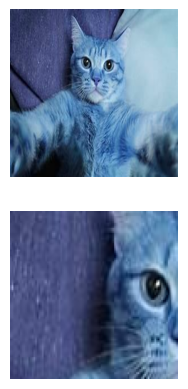

In [5]:
from matplotlib import pyplot as plt

im=imgs_gato_train[0]
patch=return_patches(im,100,[[50,50]])[0]
fig,ax=plt.subplots(2)
ax[0].imshow(im)
ax[0].axis('off')
ax[1].imshow(patch)
ax[1].axis('off')
plt.show()

assert patch.shape[0]==patch.shape[1], f'El parche deberia tener las mismas dimensiones {patch.shape[0]}x{patch.shape[0]} y tiene dimensiones {patch.shape[0]}x{patch.shape[1]}'
assert patch.shape[0]==100, f'El parche deberia tener dimensiones 100x100 y es {patch.shape[0]}x{patch.shape[1]}'
assert np.isclose(np.std(patch),np.std(im[50:50+100,50:50+100]),0.1), 'No la imagen en la posición que deberia'

##### Parte 2.1.2: Parches aleatorios
Ahora que ya tenemos una función que nos devuelve los parches que le pidamos debemos extraer los parches que consideremos que sean de utilidad. En la siguiente celda, use unicamente las imagenes de gatos de train. Escoja 10 imagenes aleatorias y 3 puntos aleatorios (estos serán los que entrarán como el parametro `num_patches` a la función `return_patches`) para obtener 3 parches de 50x50.
>- **Nota:** Para seleccionar los parches aleatorios use np.random.randint(). Adicionalmente, solo puede escoger puntos aleatorios entre (50,50) hasta (250,250) de lo contrario el recorte se saldrá de la imagen. Guarde los parches en escala de grises! para esto puede ayudarse de la función rgb2gray de skimage: https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray

In [6]:
from skimage.color import rgb2gray 

np.random.seed(42)
parches_gatos=[] #parches de gatos
r=np.random.randint(0,len(imgs_gato_train),size=10) #vector de indices de las imagenes a seleccionar
# YOUR CODE HERE

# se toman las 10 imágenes
imgs_gato_seleccionadas = imgs_gato_train[r]

# se toman las 3 coordenadas (x, y)
coordenadas_parches = np.zeros(3, dtype=tuple)
x = np.random.randint(50, 250+1, size=3)
y = np.random.randint(50, 250+1, size=3)
for i in range(3):
    coordenadas_parches[i] = (x[i],y[i])

# se obtienen los parches de cada imagen
for img_gato in imgs_gato_seleccionadas:
    parches = return_patches(img_gato,50,coordenadas_parches)
    # cada parche se pasa a gris
    parches_grises = [rgb2gray(parche_color) for parche_color in parches]
    parches_gatos += parches_grises

C:\Users\eduar\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


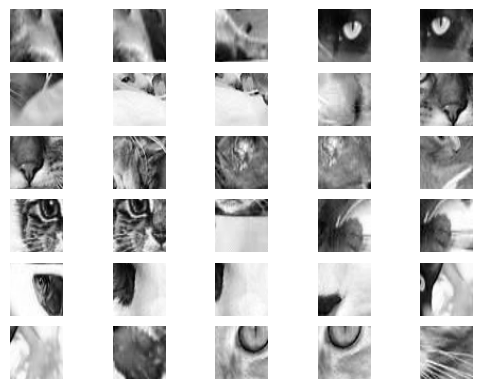

In [7]:
fig,ax=plt.subplots(6,5)
c=0
for i in range(6):
    for j in range(5):
        ax[i,j].imshow(parches_gatos[c],cmap='gray')
        ax[i,j].axis('off')
        c+=1
plt.show()

assert not(len(parches_gatos)==10 and len(parches_gatos[0])==3), 'Debe tener un solo vector de parches, no un vector de vectores'
assert len(parches_gatos)==30, 'Deberia tener 30 parches, son 3 parches de 10 imagenes'
assert parches_gatos[0].shape[0]==50, 'El parche debe tener un tamaño de 100x100'
assert np.sum(parches_gatos[0])!=0, 'Sus parches no tienen contenido'
assert len(parches_gatos[0].shape)==2, 'Sus parches deben ser grises'

##### Parte 2.1.3: Parches seleccionados
Ahora seleccionaremos parches dependiendo de una caracteristica visual, no aleatoriamente. Primero, obtendremos el gradiente de la imagen con la función `prewitt` de `skimage.filters` que calcula el gradiente de la imagen. Luego, dividiremos la imagen en parches de tamaño especificos y seleccionaremos las 3 ventanas de mayor promedio de gradiente. Haga una función que ingrese la imagen y el tamaño de parches por parametro y retorne las 3 ventanas de mayor gradiente promedio (retorne la imagen original, no el gradiente)

In [8]:
from skimage.filters import prewitt

def select_patch_gradient(im,size):
    '''''
    param-im (array): Imagen de entrada
    param-size (int): Tamaño del parche
    '''''
    # YOUR CODE HERE
    # se obtiene el gradiente de la imagen
    gradiente = prewitt(im)
    # se obtienen las coordenadas de todos los posibles parches de la imagen
    coordenadas_parches = []
    for i in range(300//size):
        for j in range(300//size):
            coordenadas_parches.append((i*size,j*size))
    coordenadas_parches = np.array(coordenadas_parches)
    # se obtienen los parches del gradiente
    parches_gradiente = return_patches(gradiente,size,coordenadas_parches)
    # se encuentran los promedios de cada parche del gradiente
    promedios = [np.mean(parche) for parche in parches_gradiente]
    # se obtienen los indices de los 3 parches con mayor promedio
    indices_mayores_tres = np.argsort(promedios)[-3:]
    # se encuentran los 3 parches de la imagen original
    parches_seleccionados = return_patches(im,size,coordenadas_parches[indices_mayores_tres])
    respuesta = [rgb2gray(parche_color) for parche_color in parches_seleccionados]
    return respuesta

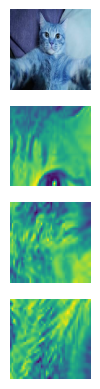

In [9]:
im=imgs_gato_train[0]
patch_gradiente=select_patch_gradient(im,50)
fig,ax=plt.subplots(4)
ax[0].imshow(im)
ax[0].axis('off')
ax[1].imshow(patch_gradiente[0])
ax[1].axis('off')
ax[2].imshow(patch_gradiente[1])
ax[2].axis('off')
ax[3].imshow(patch_gradiente[2])
ax[3].axis('off')
plt.show()

Ahora, haga una lista de los parches con las imagenes aleatorias que usó anteriormente.

In [10]:
np.random.seed(42)
r= '' #vector de indices de las imagenes a seleccionar
parches_gatos_gradiente=[]
# YOUR CODE HERE

r=np.random.randint(0,len(imgs_gato_train),size=10) #vector de indices de las imagenes a seleccionar
# se toman las 10 imágenes
imgs_gato_seleccionadas = imgs_gato_train[r]
# se obtienen los parches de dichas imagenes
for imagen_gato in imgs_gato_seleccionadas:
    parches_gatos_gradiente += select_patch_gradient(imagen_gato,50)

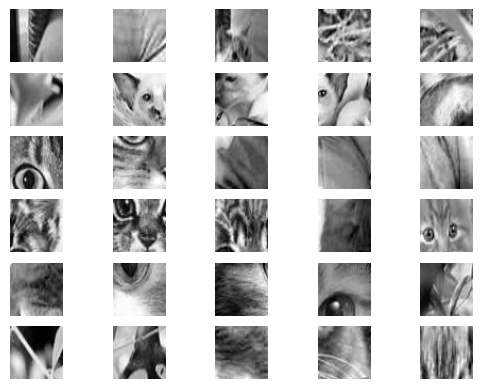

In [11]:
fig,ax=plt.subplots(6,5)
c=0
for i in range(6):
    for j in range(5):
        ax[i,j].imshow(parches_gatos_gradiente[c],cmap='gray')
        ax[i,j].axis('off')
        c+=1
plt.show()

assert not(len(parches_gatos_gradiente)==10 and len(parches_gatos_gradiente[0])==3), 'Debe tener un solo vector de parches, no un vector de vectores'
assert len(parches_gatos_gradiente)==30, 'Deberia tener 30 parches, son 3 parches de 10 imagenes'
assert parches_gatos_gradiente[0].shape[0]==50, 'El parche debe tener un tamaño de 100x100'
assert np.sum(parches_gatos_gradiente[0])!=0, 'Sus parches no tienen contenido'
assert len(parches_gatos_gradiente[0].shape)==2, 'Sus parches deben ser grises'

#### Parte 2.2: Vectores de caracteristicas
Ahora que tenemos los templates, procederemos a hacer el template matching con estos. Cada parche contiene caracteristicas que puden considerarse propias de una categoria (en este caso de los gatos) usar el template matching nos permitirá encontrar zonas donde estas caracteristicas estan precentes (en teoria). Haga uso de la función `match_template` de la libreria `skimage.feature` para hacer el template matching con cada uno de sus templates. Para cada resultado, extraiga el valor maximo y agregelo a un vector. Al final, obtendremos un vector de 30 dimensiones (uno por cada template) y usaremos esta información para la clasificación. 

Haga una función que reciba como parametro la imagen a analizar y la lista de templates, y retorne el vector que se meniconó anteriormente.

>- **Nota:** Haga el procesamiento con sus imagenes en escala de grises

In [12]:
from skimage.feature import match_template

def template_vector(im,templates):
    '''''
    param-im (array): Imagen de entrada
    param-templates (array): Vector de templates
    '''''
    # YOUR CODE HERE
    vector = []
    for template in templates:
        vector.append(np.max(match_template( rgb2gray(im), template)))
    return vector

In [13]:
im=imgs_gato_train[0]
#gato 1
v1_gato=template_vector(im,parches_gatos)
v2_gato=template_vector(im,parches_gatos_gradiente)
#gato 2
im=imgs_gato_train[2]
v3_gato=template_vector(im,parches_gatos)
v4_gato=template_vector(im,parches_gatos_gradiente)
#perro
im=imgs_perro_train[1]
v1_perro=template_vector(im,parches_gatos)
v2_perro=template_vector(im,parches_gatos_gradiente)

In [14]:
from skimage.color import rgb2gray
assert len(v1_gato)==30, 'Las dimensiones del vector deben ser 30, uno por cada template'
assert np.isclose(v1_gato[0],np.max(match_template(rgb2gray(im),parches_gatos[0])),0.1), 'La primera dimensión de su vector no correspoonde a al template matching del primer template'

Ya tenemos un par de vectores para para 3 imagenes diferentes, dos gatos y un perro. Ahora, vamos a calcular la distancia euclidea entre todos los vectores para determinar cuales se parecen más que otros.

In [15]:
d_perro_gato1='' #distancia entre vector de perro y gato 1
d_perro_gato2='' #distancia entre vector de perro y gato 2
d_gato1_gato2='' #distancia entre vector de perro y gato 1
# YOUR CODE HERE

def distancia_euclidiana(vector1, vector2):
    suma = 0
    for i in range(len(vector1)):
        suma += (vector1[i]-vector2[i])**2
    return np.sqrt(suma)
d_perro_gato1 = distancia_euclidiana(v2_perro, v2_gato)
d_perro_gato2 = distancia_euclidiana(v2_perro, v4_gato)
d_gato1_gato2 = distancia_euclidiana(v2_gato, v4_gato)

In [16]:
print(d_perro_gato1)
print(d_perro_gato2)
print(d_gato1_gato2)

assert d_perro_gato1>d_gato1_gato2, 'La distancia de el vectro de gato2 al perro debe ser menor que la del gato 1 al gato 2'

0.3174601597841203
0.2885107169658949
0.30058513061459313


#### Parte 2.3: Parches de entrenamiento
Ya hemos obtenido los parches para la categoria de gato, es hora de obtener los parches de las demas categorias. En la siguiente celda cree un diccionario, las llaves serán las los nombres de categorias y los valores serán los vectores de parches de cada categoria. Escoja unicamente la selección de parches por gradiente.

In [17]:
parches_entrenamiento={}
np.random.seed(42)
llaves=['gato','elefante','perro','oveja','caballo']
r2=np.random.randint(0,len(imgs_elefante_train),size=10)
r3=np.random.randint(0,len(imgs_perro_train),size=10)
r4=np.random.randint(0,len(imgs_oveja_train),size=10)
r5=np.random.randint(0,len(imgs_caballo_train),size=10)

# YOUR CODE HERE

# función con el procedimiento de parches de gradiente
def parches_train(r, imgs):
    imgs_seleccionadas = imgs[r]
    parches_gradiente = []
    for img in imgs_seleccionadas:
        parches_gradiente += select_patch_gradient(img,50)
    return parches_gradiente

# ya se tiene gato, solo se agrega
parches_entrenamiento['gato'] = parches_gatos_gradiente
# se toman los nuevos r e imgs
rs = [r2, r3, r4, r5]
imgs = [imgs_elefante_train, imgs_perro_train, imgs_oveja_train, imgs_caballo_train]
# se obtienen los parches, que son los valores del diccionario
values = [parches_train(rs[i], imgs[i]) for i in range(4)]
# se añaden los resultados obtenidos al diccionario
for i in range(4):
    parches_entrenamiento[llaves[i+1]] = values[i]

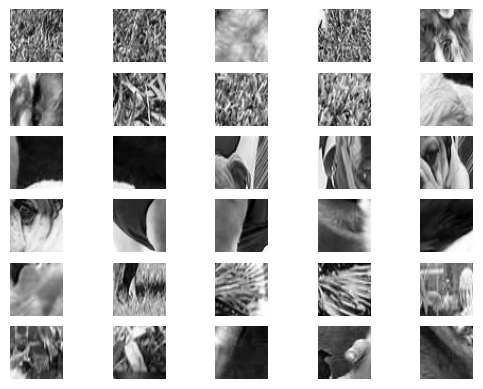

In [18]:
parches=parches_entrenamiento['perro']

fig,ax=plt.subplots(6,5)
c=0
for i in range(6):
    for j in range(5):
        ax[i,j].imshow(parches[c],cmap='gray')
        ax[i,j].axis('off')
        c+=1
plt.show()

In [19]:
assert len(parches_entrenamiento.keys())==5, 'Debe tener 5 llaves su diccionario'
assert 'perro' in parches_entrenamiento.keys(), 'Su diccionario debe tener la llave perro'
assert 'gato' in parches_entrenamiento.keys(), 'Su diccionario debe tener la llave gato'
assert len(parches_entrenamiento['perro'])==30, 'Debe tener 30 templates de perro en su diccionario'
assert parches_entrenamiento['perro'][0].shape[0]==50, 'Sus parches deben ser 50x50'

#### Parte 2.4: Vectores de entrenamiento
Ahora, haremos uso de todos nuestros parches para generar los vectores de template matching. Haga una función que reciba el diccionario de parches de entrenamiento como parametro y una imagen a la cual sacar el descriptor. El descriptor final será un vector resultado de la concatenación de los vectores gato,elefante,perro,oveja,caballo en ese orden.

In [20]:
def vector_final(dict_entrenamiento,im):
    '''''
    param-dict_entrenamiento (dict): Diccionario de parches de entrenamiento
    param-im (array): Imagen de entrada
    '''''
    # YOUR CODE HERE
    vector = []
    orden_clases = ['gato','elefante','perro','oveja','caballo']
    for clase in orden_clases:
        parches_clase = dict_entrenamiento[clase]
        vector += template_vector(im, parches_clase)
    respuesta = np.array(vector)  
    return respuesta

In [21]:
im=imgs_gato_train[0]
v_descriptor=vector_final(parches_entrenamiento,im)

assert len(v_descriptor)==150, 'Las dimensiones del descriptor deberian ser 150, 30 por cada clase'
assert template_vector(im,parches_entrenamiento['perro'])[0]==v_descriptor[60], 'El vector de descriptor final no se encuentra ordenado como se especificó'

### Parte 3: Clasificador
Ya tenemos una forma de describir nuestras imagenes en forma de vectores, ahora vamos a crear un clasificador de las imagenes que use estos vectores de template matching para comparar las imagenes de entrenamiento con nuevas imagenes de validación. Para esto, crearemos una clase llamada NN_classifier que se inicializará unicamente con el diccionario de parches de entrenamiento. Los atributos de esta clase deben ser el diccionario de parches, los vectores de entrenamiento y las etiquetas de cada vector de entrenamiento. Los vectores de entrenamiento y etiquetas deben iniciar vacios.

Las funciones de la clase deben ser fit, predict y vector_final (la función que ya crearon con anterioridad).

>- La función de fit debe recibir las imagenes X y las etiquetas y como parametro, debe obtener el descriptor de las imagenes y luego guardar los vectores en el vector de entrenamiento. Haga la función de tal forma que se agreguen vectores de entrenamiento a los atributos, y se pueda entrenar varias veces (Use .append para agregar los nuevos vectores a los atributos)
>- La función predict debe recibir un vector de imagenes X, sacar el descriptor de cada imagen y, mediante el metodo de vecino más cercano, determinar la etiqueta de la imagen. Para esto, debe calcular la distancia EUCLIDEA entre su descriptor actual con todos los vectores de entrenamiento, encontrar la menor distancia y extraer la label de este vector para asignarsela al nuevo dato la etiqueta. 

In [30]:
class NN_classifier:
    def __init__(self,descriptor):
        '''
        :param descriptor (dict): Diccionario de templates de entrenamiento.
        '''
        self.descriptor = '' #atributo del diccionario de templates
        self.vectores='' #atributo del vector de descriptores de entrenamiento
        self.etiquetas='' #atributo del vector de etiquetas
        # YOUR CODE HERE
        self.descriptor = descriptor
        self.vectores = []
        self.etiquetas = []
        
    def fit(self,X,y):
        '''
        :param X: Imagenes de entrenamiento
        :param y: Labels de las imagenes
        :return: self (Trained descriptor)
        '''
        # YOUR CODE HERE
        for imagen, etiqueta in zip(X,y):
            vector = vector_final(self.descriptor, imagen)
            self.vectores.append(vector)
            self.etiquetas.append(etiqueta)
        return self
    
    def vector_final(self,dict_entrenamiento,im):
        '''''
        param-dict_entrenamiento (dict): Diccionario de parches de entrenamiento
        param-im (array): Imagen de entrada
        '''''
        # YOUR CODE HERE
        vector = []
        orden_clases = ['gato','elefante','perro','oveja','caballo']
        for clase in orden_clases:
            parches_clase = dict_entrenamiento[clase]
            vector += template_vector(im, parches_clase)
        respuesta = np.array(vector)  
        return respuesta
    
    def NN(train_data, predict):
        # YOUR CODE HERE
        predict_vector = [] # Inicializamos el vector a retornar
        train_vectors, train_etiquetas = train_data

        for pred_vector in predict:
            # Inicio variables de búsqueda
            distancia_minima = np.inf
            etiqueta_minima = None
            for j, train_vector in enumerate(train_vectors):
                # Para cada valor a predecir, se toma cada dato de entrenamiento
                suma = 0
                for i in range(len(train_vector)):
                    suma += (train_vector[i]-pred_vector[i])**2
                # Se calcula la distancia entre el vector a predecir y el dato de train
                distancia = np.sqrt(suma) 
                # En caso de ser la menor, se actualiza la etiqueta a retornar
                if distancia < distancia_minima:
                    distancia_minima = distancia
                    etiqueta_minima = train_etiquetas[j]
            # Por último, se añade el mínimo encontrado
            predict_vector.append(etiqueta_minima)

        return predict_vector
    
    def predict(self,X):
        '''
        :param X (array): Imagenes a predecir
        :return: Arreglo de etiquetas predichas
        '''
        
        etiqueta = np.zeros(len(X))
        
        # YOUR CODE HERE
        for n, imagen in enumerate(X):
            # primero hallar el descriptor de la imagen
            pred_vector = []
            # encontrar el minimo de distancia                
            distancia_minima = np.inf
            etiqueta_minima = None
            for j, train_vector in enumerate(self.vectores):
                # calculo de distancia
                suma = 0
                for i in range(len(train_vector)):
                    suma += (train_vector[i]-pred_vector[i])**2
                distancia = np.sqrt(suma)
                # actualizacion en caso de ser la menor distancia
                if distancia < distancia_minima:
                    distancia_minima = distancia
                    etiqueta[n] = self.etiquetas[j]
        return etiqueta

#### 3.1: Entrenamiento
Ahora que tenemos un modelo clasificador de imagenes, vamos a entrenarlo con nuestras imagenes de entrenamiento. Use la función fit del objeto NN_classifier para entrenar con las imagenes de entrenamiento. Si el modelo se demora mucho entrenando con todas las imagenes, escoja 50 imagenes aleatorias de cada clase para entrenar. Tenga en cuenta que cada categoria debe tener una etiqueta diferente, llene el siguiente diccionario, donde las llaves son las categorias y el value es la etiqueta.

In [31]:
dict_etiquetas={}
etiqueta_gato='' #vector de etiquetas de gato 1
etiqueta_perro='' #vector de etiquetas de perro 2
etiqueta_elefante='' #vector de etiquetas de elefante 3
etiqueta_oveja='' #vector de etiquetas de oveja 4
etiqueta_caballo='' #vector de etiquetas de caballo 5

imagenes_gato_train='' #vector de imagenes de gato
imagenes_perro_train='' #vector de imagenes de perro
imagenes_elefante_train='' #vector de imagenes de elefante
imagenes_oveja_train='' #vector de imagenes de oveja
imagenes_caballo_train='' #vector de imagenes de caballo

# YOUR CODE HERE
dict_etiquetas = dict(zip(['gato','perro','elefante','oveja','caballo'],[1,2,3,4,5]))
print(dict_etiquetas)

etiqueta_gato = [1]*50
etiqueta_perro = [2]*50
etiqueta_elefante = [3]*50
etiqueta_oveja = [4]*50
etiqueta_caballo = [5]*50

imagenes_gato_train = imgs_gato_train[np.random.randint(0,len(imgs_gato_train),size=50)]
imagenes_perro_train = imgs_perro_train[np.random.randint(0,len(imgs_perro_train),size=50)]
imagenes_elefante_train = imgs_elefante_train[np.random.randint(0,len(imgs_elefante_train),size=50)]
imagenes_oveja_train = imgs_oveja_train[np.random.randint(0,len(imgs_oveja_train),size=50)]
imagenes_caballo_train = imgs_caballo_train[np.random.randint(0,len(imgs_caballo_train),size=50)]

#imagenes = [imagenes_gato_train, imagenes_perro_train, imagenes_elefante_train, imagenes_oveja_train, imagenes_caballo_train]
#etiquetas = [etiqueta_gato, etiqueta_perro, etiqueta_elefante, etiqueta_oveja, etiqueta_caballo]

{'gato': 1, 'perro': 2, 'elefante': 3, 'oveja': 4, 'caballo': 5}


In [32]:
assert len(dict_etiquetas.keys())==5,'Deben haber 5 diferentes numeros como etiquetas para sus clases'
assert len(np.unique(dict_etiquetas.keys())), 'Solo deben haber 5 etiquetas'
assert dict_etiquetas['gato']==etiqueta_gato[0], 'La etiqueta de gato en el diccionario debe ser igual que en su vector de etiquetas'

In [33]:
model=NN_classifier(parches_entrenamiento)
model.fit(imagenes_gato_train,etiqueta_gato)
model.fit(imagenes_perro_train,etiqueta_perro)
model.fit(imagenes_elefante_train,etiqueta_elefante)
model.fit(imagenes_oveja_train,etiqueta_oveja)
model.fit(imagenes_caballo_train,etiqueta_caballo)

In [34]:
assert len(model.vectores)==len(imagenes_gato_train)+len(imagenes_perro_train)+len(imagenes_elefante_train)+len(imagenes_oveja_train)+len(imagenes_caballo_train), 'La cantidad de imagenes de entrnamiento y los vectores de entrenamiento no coinsiden'
assert len(model.etiquetas)==len(model.vectores),'La cantidad de vectores y la cantidad de etiquetas no coinsiden'
assert len(model.vectores[0])==150, f'Las dimensiones del descriptor deben ser 150 y son {len(model.vectores[0])}'

In [35]:
im=imgs_gato_train[0]
prediccion=model.predict([im])

IndexError: list index out of range

In [ ]:
assert len(prediccion) ==1, 'Solo deberia haber una unica predicción para una unica imagen'
assert prediccion[0] in dict_etiquetas.values(), 'La predicción no se encuentra en el diccionario de etiquetas'

### Parte 4: Validación y test
Ya tenemos un modelo entrenado con las imagenes de entrenamiento, es hora de probar nuestro modelo en la base de datos de validación y test. Utilice la siguiente celda para cargar las imagenes de validacion y test y realizar la predicción. Luego, saque las metricas pertinentes, puede usar las funciones de sklearn.

## Informe
En esta ocasión, iremos construyendo nuestro informe con cada entrega, el maximo de paginas de cada entrega será de 2. 

### Introducción:
Inicialmente, es fundamental conocer el contexto del problema para así plantear de manera correcta el proyecto. Debido a esto, basados tanto en la descripción del problema que tienen disponible como otros artículos que pueden encontrar en internet, deben incluir en esta primera entrega de su Artículo el contexto del problema, la motivación para resolverlo, la definición del problema y justificar la relevancia de este. Para hacer esta sección pueden guiarse de las siguientes preguntas:

>- ¿Qué problema se va a trabajar?
>- ¿Por qué es importante trabajar esta problemática?
>- ¿Qué indicadores suelen usarse para hacer esta tarea de forma manual?
>- ¿Qué problemas pueden encontrarse? 
>- ¿Qué ejemplos se pueden encontrar de estos problemas?
>- ¿Por qué es necesario usar análisis de imágenes para resolver esta tarea?
>- ¿Cual es su objetivo?


### Base de datos:
Ahora que se tiene ya el contexto y el trabajo relacionado es momento de empezar a describir el trabajo que se está realizando actualmente. Para esto, en la subsección de base de datos deben realizar una descripción completa de la base de datos con todos sus elementos importantes. Al ser esta una base de datos completamente nueva es necesario hacer una descripción mas a fondo de esta, incluyendo su cantidad de datos distribución y demás elementos. Para esta sección pueden apoyarse en las siguientes preguntas para agregar su contenido:

>- ¿Cuales clases hay en su base de datos?
>- ¿Como son sus imagenes?
>- ¿Como se distribuyen sus carpetas de entrenamiento, validación y prueba?
>- ¿Cuantas instancias hay de cada una de las clases?